In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [430]:
train_data = pd.read_csv('house-prices-advanced-regression-techniques/train.csv', index_col=0)
test_data = pd.read_csv('house-prices-advanced-regression-techniques/test.csv', index_col=0)

In [431]:
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [432]:
test_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


## Removing missing values

In [433]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(train_data.isnull().sum())

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

### First, let's remove variables with most of the values missing

In [434]:
y = train_data.SalePrice
X = train_data.drop(['SalePrice'], axis=1)

In [435]:
df = pd.concat([X , test_data])
df = df.drop(['PoolQC', 'Fence', 'MiscFeature', 'Alley', 'FireplaceQu'], axis=1)

In [436]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal


In [437]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df.isnull().sum())

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath     

In [438]:
df.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [439]:
df.MSZoning[df["Neighborhood"] == "IDOTRR"]

Id
22           RM
31      C (all)
53           RM
62           RM
89      C (all)
         ...   
2890         RM
2891         RM
2892    C (all)
2893    C (all)
2894    C (all)
Name: MSZoning, Length: 93, dtype: object

In [440]:
df.groupby('MSSubClass')['LotFrontage'].apply(lambda x: x.isnull().sum()).to_dict()

{20: 185,
 30: 13,
 40: 1,
 45: 0,
 50: 25,
 60: 133,
 70: 11,
 75: 2,
 80: 33,
 85: 16,
 90: 17,
 120: 32,
 150: 1,
 160: 12,
 180: 1,
 190: 4}

In [441]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [442]:
df['MSZoning'] = df.groupby('Neighborhood')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [233]:
# df['Electrical'] = df["Electrical"].fillna(df.Electrical.mode())

In [443]:
categorical_columns = df.select_dtypes(exclude=['int64','float64']).columns

In [444]:
categorical_columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [445]:
df[categorical_columns] = df[categorical_columns].transform(lambda x: x.fillna(x.mode()[0]))   
df = df.fillna(0)

In [314]:
# numeric_missed = ['BsmtFinSF1',
#                   'BsmtFinSF2',
#                   'BsmtUnfSF',
#                   'TotalBsmtSF',
#                   'BsmtFullBath',
#                   'BsmtHalfBath',
#                   'GarageYrBlt',
#                   'GarageArea',
#                   'GarageCars',
#                   'MasVnrArea']
# for feature in numeric_missed:
#     df[feature] = df[feature].fillna(0)

In [353]:
# df = df.transform(lambda x: x.fillna(x.mean()[0]))   

## Fix skewness

<AxesSubplot:>

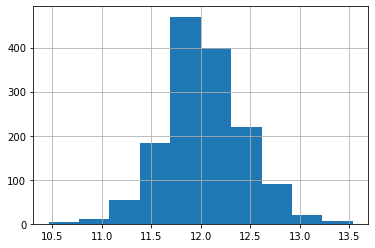

In [446]:
y = np.log1p(y)
y.hist()

In [447]:
from scipy.stats import norm, skew

In [448]:
numeric_feats = df.dtypes[df.dtypes != 'object'].index
skewed_feats = df[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_feats[abs(skewed_feats) > 0.5]
high_skew.head(50)

MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
MasVnrArea        2.613592
OpenPorchSF       2.535114
WoodDeckSF        1.842433
LotFrontage       1.505704
1stFlrSF          1.469604
BsmtFinSF1        1.425230
MSSubClass        1.375457
GrLivArea         1.269358
TotalBsmtSF       1.156894
BsmtUnfSF         0.919339
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.624832
OverallCond       0.570312
YearBuilt        -0.599806
GarageYrBlt      -3.906205
dtype: float64

In [450]:
for feature in high_skew.index:
    df[feature] = np.log1p(df[feature])

## Adding categorical columns

In [451]:
df = pd.get_dummies(df)


### Delete variables with low correlation with the price

In [452]:
corr = train_data.corr()["SalePrice"]

In [453]:
corr[abs(corr) < 0.05]

BsmtFinSF2     -0.011378
LowQualFinSF   -0.025606
BsmtHalfBath   -0.016844
3SsnPorch       0.044584
MiscVal        -0.021190
MoSold          0.046432
YrSold         -0.028923
Name: SalePrice, dtype: float64

In [476]:
low_corr = ["BsmtFinSF2", "LowQualFinSF", "BsmtHalfBath", "MiscVal", "YrSold"]

In [455]:
df = df.drop(low_corr, axis=1)

<AxesSubplot:>

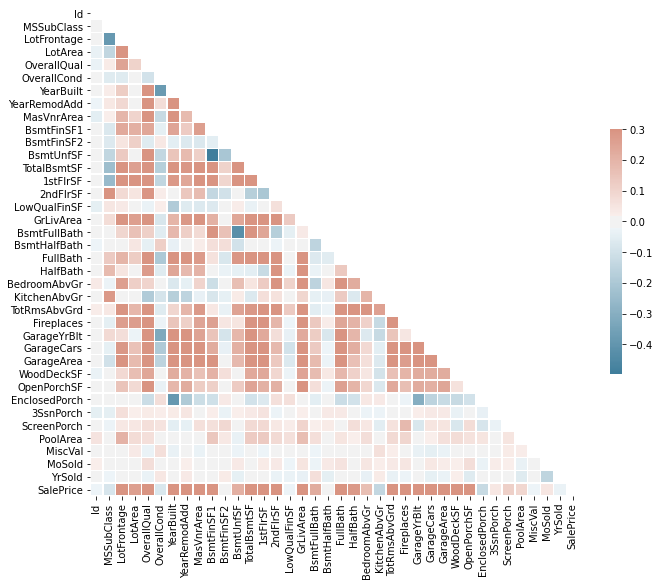

In [396]:
# mask = np.triu(np.ones_like(corr, dtype=bool))

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [456]:
train = df[:len(train_data)]
test = df[len(train_data):]

In [457]:
print(train.shape, test.shape, train_data.shape)

(1460, 265) (1459, 265) (1460, 80)


In [458]:
X = train

In [459]:
y

Id
1       12.247699
2       12.109016
3       12.317171
4       11.849405
5       12.429220
          ...    
1456    12.072547
1457    12.254868
1458    12.493133
1459    11.864469
1460    11.901590
Name: SalePrice, Length: 1460, dtype: float64

## Training

In [460]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [461]:
X_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
893,3.044522,4.262680,9.037771,6,2.197225,7.582738,2003,0.000000,6.498282,5.983936,...,0,0,0,1,0,0,0,0,1,0
1106,4.110874,4.595120,9.413852,8,1.791759,7.598399,1995,5.894403,6.940222,6.068426,...,0,0,0,1,0,0,0,0,1,0
414,3.433987,4.043051,9.100637,5,1.945910,7.564238,1950,0.000000,0.000000,6.916715,...,0,0,0,1,0,0,0,0,1,0
523,3.931826,3.931826,8.517393,6,2.079442,7.574558,1950,0.000000,5.991465,6.406880,...,0,0,0,1,0,0,0,0,1,0
1037,3.044522,4.499810,9.464905,9,1.791759,7.604894,2008,4.262680,6.930495,6.395262,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,3.931826,4.753590,9.965852,5,1.791759,7.575072,1950,0.000000,0.000000,6.580639,...,0,0,0,1,0,0,0,0,1,0
391,3.931826,3.931826,9.036701,5,2.197225,7.550135,1950,0.000000,5.488938,5.438079,...,0,0,0,1,0,0,0,0,1,0
1410,4.110874,3.850148,9.930373,7,1.945910,7.594381,1991,4.820282,0.000000,6.674561,...,0,0,0,1,0,0,0,0,1,0


In [328]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [365]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
prediction_rf = rf.predict(X_test)


In [462]:
from catboost import CatBoostRegressor

In [463]:
catboost = CatBoostRegressor()
catboost.fit(X_train, y_train)

Learning rate set to 0.038876
0:	learn: 0.3828186	total: 5.68ms	remaining: 5.67s
1:	learn: 0.3733702	total: 10.1ms	remaining: 5.06s
2:	learn: 0.3644549	total: 15.4ms	remaining: 5.13s
3:	learn: 0.3556451	total: 20.1ms	remaining: 5s
4:	learn: 0.3469566	total: 24.5ms	remaining: 4.88s
5:	learn: 0.3398638	total: 28.6ms	remaining: 4.74s
6:	learn: 0.3322713	total: 34ms	remaining: 4.82s
7:	learn: 0.3251037	total: 39.5ms	remaining: 4.89s
8:	learn: 0.3179724	total: 44.8ms	remaining: 4.94s
9:	learn: 0.3116016	total: 50.1ms	remaining: 4.96s
10:	learn: 0.3052454	total: 54.2ms	remaining: 4.87s
11:	learn: 0.2985449	total: 58.2ms	remaining: 4.79s
12:	learn: 0.2923915	total: 62.3ms	remaining: 4.73s
13:	learn: 0.2860829	total: 66.2ms	remaining: 4.67s
14:	learn: 0.2803036	total: 70.4ms	remaining: 4.62s
15:	learn: 0.2748253	total: 74.5ms	remaining: 4.58s
16:	learn: 0.2692209	total: 79.8ms	remaining: 4.61s
17:	learn: 0.2640114	total: 83.9ms	remaining: 4.58s
18:	learn: 0.2584704	total: 88.4ms	remaining: 4.5

163:	learn: 0.0999724	total: 755ms	remaining: 3.85s
164:	learn: 0.0997299	total: 770ms	remaining: 3.89s
165:	learn: 0.0995171	total: 777ms	remaining: 3.9s
166:	learn: 0.0993123	total: 785ms	remaining: 3.92s
167:	learn: 0.0990521	total: 793ms	remaining: 3.92s
168:	learn: 0.0989247	total: 796ms	remaining: 3.92s
169:	learn: 0.0987039	total: 801ms	remaining: 3.91s
170:	learn: 0.0984605	total: 809ms	remaining: 3.92s
171:	learn: 0.0982268	total: 816ms	remaining: 3.93s
172:	learn: 0.0979746	total: 821ms	remaining: 3.93s
173:	learn: 0.0977216	total: 828ms	remaining: 3.93s
174:	learn: 0.0974185	total: 834ms	remaining: 3.93s
175:	learn: 0.0971219	total: 840ms	remaining: 3.93s
176:	learn: 0.0968914	total: 847ms	remaining: 3.94s
177:	learn: 0.0966861	total: 851ms	remaining: 3.93s
178:	learn: 0.0965504	total: 857ms	remaining: 3.93s
179:	learn: 0.0963365	total: 862ms	remaining: 3.93s
180:	learn: 0.0961281	total: 868ms	remaining: 3.93s
181:	learn: 0.0958117	total: 877ms	remaining: 3.94s
182:	learn: 0

331:	learn: 0.0732169	total: 1.72s	remaining: 3.45s
332:	learn: 0.0731345	total: 1.72s	remaining: 3.45s
333:	learn: 0.0730033	total: 1.73s	remaining: 3.44s
334:	learn: 0.0728872	total: 1.73s	remaining: 3.43s
335:	learn: 0.0727242	total: 1.73s	remaining: 3.43s
336:	learn: 0.0725885	total: 1.74s	remaining: 3.42s
337:	learn: 0.0724232	total: 1.74s	remaining: 3.41s
338:	learn: 0.0723790	total: 1.75s	remaining: 3.41s
339:	learn: 0.0722263	total: 1.75s	remaining: 3.4s
340:	learn: 0.0721639	total: 1.75s	remaining: 3.39s
341:	learn: 0.0721014	total: 1.76s	remaining: 3.38s
342:	learn: 0.0719280	total: 1.76s	remaining: 3.38s
343:	learn: 0.0717883	total: 1.76s	remaining: 3.37s
344:	learn: 0.0716250	total: 1.77s	remaining: 3.36s
345:	learn: 0.0714721	total: 1.77s	remaining: 3.35s
346:	learn: 0.0713376	total: 1.78s	remaining: 3.34s
347:	learn: 0.0712368	total: 1.78s	remaining: 3.33s
348:	learn: 0.0711694	total: 1.78s	remaining: 3.33s
349:	learn: 0.0710677	total: 1.79s	remaining: 3.32s
350:	learn: 0

531:	learn: 0.0559673	total: 2.48s	remaining: 2.18s
532:	learn: 0.0558681	total: 2.49s	remaining: 2.18s
533:	learn: 0.0557764	total: 2.49s	remaining: 2.17s
534:	learn: 0.0557055	total: 2.49s	remaining: 2.17s
535:	learn: 0.0556982	total: 2.5s	remaining: 2.16s
536:	learn: 0.0556138	total: 2.5s	remaining: 2.16s
537:	learn: 0.0556043	total: 2.51s	remaining: 2.15s
538:	learn: 0.0555970	total: 2.51s	remaining: 2.15s
539:	learn: 0.0555786	total: 2.52s	remaining: 2.14s
540:	learn: 0.0554772	total: 2.52s	remaining: 2.14s
541:	learn: 0.0553572	total: 2.52s	remaining: 2.13s
542:	learn: 0.0552239	total: 2.53s	remaining: 2.13s
543:	learn: 0.0551564	total: 2.53s	remaining: 2.12s
544:	learn: 0.0550759	total: 2.53s	remaining: 2.12s
545:	learn: 0.0549996	total: 2.54s	remaining: 2.11s
546:	learn: 0.0549350	total: 2.54s	remaining: 2.1s
547:	learn: 0.0549146	total: 2.54s	remaining: 2.1s
548:	learn: 0.0548655	total: 2.55s	remaining: 2.09s
549:	learn: 0.0547679	total: 2.55s	remaining: 2.09s
550:	learn: 0.05

699:	learn: 0.0465032	total: 3.25s	remaining: 1.39s
700:	learn: 0.0464396	total: 3.25s	remaining: 1.39s
701:	learn: 0.0463832	total: 3.25s	remaining: 1.38s
702:	learn: 0.0463320	total: 3.26s	remaining: 1.38s
703:	learn: 0.0462741	total: 3.26s	remaining: 1.37s
704:	learn: 0.0462063	total: 3.27s	remaining: 1.37s
705:	learn: 0.0461471	total: 3.27s	remaining: 1.36s
706:	learn: 0.0460906	total: 3.28s	remaining: 1.36s
707:	learn: 0.0460501	total: 3.28s	remaining: 1.35s
708:	learn: 0.0459789	total: 3.29s	remaining: 1.35s
709:	learn: 0.0459105	total: 3.29s	remaining: 1.34s
710:	learn: 0.0458529	total: 3.29s	remaining: 1.34s
711:	learn: 0.0457851	total: 3.3s	remaining: 1.33s
712:	learn: 0.0457235	total: 3.31s	remaining: 1.33s
713:	learn: 0.0456944	total: 3.31s	remaining: 1.33s
714:	learn: 0.0455941	total: 3.32s	remaining: 1.32s
715:	learn: 0.0455247	total: 3.33s	remaining: 1.32s
716:	learn: 0.0454325	total: 3.33s	remaining: 1.32s
717:	learn: 0.0453745	total: 3.34s	remaining: 1.31s
718:	learn: 0

858:	learn: 0.0390446	total: 4.01s	remaining: 658ms
859:	learn: 0.0389912	total: 4.01s	remaining: 653ms
860:	learn: 0.0389870	total: 4.01s	remaining: 648ms
861:	learn: 0.0389728	total: 4.02s	remaining: 644ms
862:	learn: 0.0389147	total: 4.02s	remaining: 639ms
863:	learn: 0.0388558	total: 4.03s	remaining: 634ms
864:	learn: 0.0388313	total: 4.03s	remaining: 630ms
865:	learn: 0.0387964	total: 4.04s	remaining: 625ms
866:	learn: 0.0387771	total: 4.04s	remaining: 620ms
867:	learn: 0.0387148	total: 4.04s	remaining: 615ms
868:	learn: 0.0386845	total: 4.05s	remaining: 610ms
869:	learn: 0.0386440	total: 4.05s	remaining: 606ms
870:	learn: 0.0385755	total: 4.06s	remaining: 601ms
871:	learn: 0.0384984	total: 4.06s	remaining: 596ms
872:	learn: 0.0384638	total: 4.06s	remaining: 591ms
873:	learn: 0.0384113	total: 4.07s	remaining: 586ms
874:	learn: 0.0383417	total: 4.07s	remaining: 581ms
875:	learn: 0.0383324	total: 4.07s	remaining: 577ms
876:	learn: 0.0382716	total: 4.08s	remaining: 572ms
877:	learn: 

In [464]:
prediction_cb = catboost.predict(X_test)

## Choosing the best parametres 

### Random Forest

In [26]:
reg_rf = RandomForestRegressor()

In [27]:
parametrs = {'n_estimators': [10,15, 22, 24, 26], 'max_depth' : [7, 10, 13, 15], 
             'min_samples_leaf': range(1, 5)}

In [28]:
grid_search_cv_reg = GridSearchCV(reg_rf, parametrs, cv=5)

In [29]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
616,85,80.0,8800,6,7,1963,1963,156.0,763.0,0.0,...,0,0,0,1,1,0,0,0,0,0
614,20,70.0,8402,5,5,2007,2007,0.0,206.0,0.0,...,1,0,0,0,0,0,0,0,0,1
1304,20,73.0,8688,7,5,2005,2005,228.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
487,20,79.0,10289,5,7,1965,1965,168.0,836.0,0.0,...,0,0,0,1,0,0,0,0,1,0
562,20,77.0,10010,5,5,1974,1975,0.0,1071.0,123.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,20,78.0,9317,6,5,2006,2006,0.0,24.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1131,50,65.0,7804,4,3,1928,1950,0.0,622.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1295,20,60.0,8172,5,7,1955,1990,0.0,167.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [106]:
y_train

Id
616     11.831386
614     11.898195
1304    12.354497
487     11.957618
562     12.043560
          ...    
1096    12.080696
1131    11.813037
1295    11.652696
861     12.154521
1127    12.066816
Name: SalePrice, Length: 978, dtype: float64

In [31]:
grid_search_cv_clf.fit(X_train, y_train)

/Users/yulialysenko/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 10, 13, 15],
                         'min_samples_leaf': range(1, 5),
                         'n_estimators': [10, 15, 22, 24, 26]})

In [91]:
grid_search_cv_clf.best_params_

{'max_depth': 13, 'min_samples_leaf': 4, 'n_estimators': 26}

In [32]:
best_clf = grid_search_cv_clf.best_estimator_

In [33]:
best_clf.score(X_test, y_test)

0.006224066390041493

In [34]:
predict = best_clf.predict(X_test)

In [35]:
predict.shape

(482,)

### CatBoost

In [477]:
def catBoost(X_train, y_train, X_test):
    catM = CatBoostRegressor(verbose=0, allow_writing_files=False)
    params = {'learning_rate': [0.01, 0.05, 0.005, 0.0005],
              'depth': [4, 6, 10],
              'l2_leaf_reg': [1, 2, 3, 5, 9]}

    grid_search_cat = RandomizedSearchCV(estimator=catM, scoring='neg_root_mean_squared_error', param_distributions=params, n_iter=10, cv=4, verbose=2,
                                     random_state=42, n_jobs=-1)
    grid_search_cat.fit(X_train, y_train)
    catModel = grid_search_cat.best_estimator_
    print('Best params(CatBoost):',grid_search_cat.best_params_)
    print('RMSE(CatBoost):', -grid_search_cat.best_score_)
    return catModel

In [478]:
#catModel = catBoost(X_train, y_train, X_test)
catModel = CatBoostRegressor(verbose=0, allow_writing_files=False, learning_rate=0.05, l2_leaf_reg=2, depth=4)


In [480]:
catModel.fit(X_train, y_train)
prediction_cb_best = catModel.predict(X_test)

### Calculate error

In [36]:
from sklearn.metrics import mean_squared_log_error


In [333]:
np.expm1(prediction)

array([138405.80095912, 320173.9444338 , 115959.00262958, 148894.65394112,
       305486.86111991,  81651.20807597, 208696.31232981, 150876.00027458,
        80498.32939055, 123118.0476211 , 166896.05274718, 119409.75541572,
       104401.34985422, 209039.21517679, 177844.1261156 , 127428.57122672,
       191278.95786384, 135244.55091827, 114615.44449724, 210555.29612191,
       171752.21032987, 223659.94105583, 174325.78273919, 122941.89263885,
       197356.57477477, 165632.4217141 , 179718.88822531, 101702.07205091,
       178146.95688357, 198092.85586961, 126429.28341588, 250410.67679378,
       167153.02998468, 111827.09154982, 254551.01551594, 148265.80067311,
       135748.87311322, 207268.62381629, 309394.84432446, 107994.79945016,
       124101.99693578, 231244.7027839 , 119072.84081621, 343085.25451686,
       139888.77780195, 129719.34654831, 118276.71260193, 128420.02888938,
       385330.76251161, 137774.87244676, 119937.28389156, 188847.9040185 ,
       115374.28283377, 3

In [334]:
y_test

892     11.947956
1105    12.691584
413     11.652696
522     11.976666
1036    12.661917
          ...    
1010    11.813037
390     11.686887
1409    12.278398
847     11.801864
1284    12.037660
Name: SalePrice, Length: 482, dtype: float64

In [382]:
np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(prediction_rf)))

NameError: name 'prediction_rf' is not defined

In [482]:
np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(prediction_cb)))

0.1253367891240659

In [481]:
np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(prediction_cb_best)))

0.12436532472589833

In [368]:
y_test

892     11.947956
1105    12.691584
413     11.652696
522     11.976666
1036    12.661917
          ...    
1010    11.813037
390     11.686887
1409    12.278398
847     11.801864
1284    12.037660
Name: SalePrice, Length: 482, dtype: float64

In [483]:
y_pred = catModel.predict(test)

In [484]:
y_pred

array([11.72118703, 11.94504225, 12.09210052, ..., 11.95725423,
       11.67662199, 12.30363728])

In [485]:
sample = pd.read_csv('house-prices-advanced-regression-techniques/sample_submission.csv')

In [486]:
sample

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [487]:
tmp = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')

In [488]:
tmp['SalePrice'] = np.expm1(y_pred)

In [489]:
y_pred.shape

(1459,)

In [490]:
pred_df = tmp[['Id', 'SalePrice']]
pred_df.set_index('Id', inplace=True)

In [491]:
pred_df

,SalePrice
Id,
1461,123152.525665
1462,154050.500701
1463,178455.564772
1464,190370.159530
1465,195089.202811
...,...
2915,77999.468495
2916,82183.213482
2917,155943.309214


In [492]:
pred_df.to_csv('out.csv')

In [126]:
y

Id
1       208500.0
2       181500.0
3       223500.0
4       140000.0
5       250000.0
          ...   
1456    175000.0
1457    210000.0
1458    266500.0
1459    142125.0
1460    147500.0
Name: SalePrice, Length: 1460, dtype: float64